In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/datatran2024.csv', encoding='latin1', sep=';', low_memory= False)

df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789,01/01/2024,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804,01/01/2024,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806,01/01/2024,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818,01/01/2024,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838,01/01/2024,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT


## 1. Tratamento dos Dados

#### 1.1 Dataframe com Metadados

In [2]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# EDA - Análise Exploratória de Dados
metadata_df = generate_metadata(df)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,veiculos,int64,0,0.00,19
1,br,int64,0,0.00,113
2,feridos,int64,0,0.00,36
3,ignorados,int64,0,0.00,17
4,ilesos,int64,0,0.00,47
5,feridos_graves,int64,0,0.00,17
6,feridos_leves,int64,0,0.00,34
7,mortos,int64,0,0.00,10
8,pessoas,int64,0,0.00,55
9,id,object,0,0.00,60365


#### 1.2 Limpeza e Padronização dos Dados

In [3]:
# Calculando percentual de valores faltantes
missing_values = (df.isnull().sum() / len(df)) * 100

print("Percentual de valores faltantes por coluna:")
print(missing_values[missing_values > 0])

Percentual de valores faltantes por coluna:
classificacao_acidente    0.001657
regional                  0.001657
delegacia                 0.039758
uop                       0.157376
dtype: float64


In [4]:
#Remove as linhas que têm nulos nessas colunas categóricas (tipo 'object')
df = df.dropna(subset=df.select_dtypes(include='object').columns)

In [5]:
import unicodedata
import re

# Padroniza nomes das colunas
df.columns = df.columns.str.strip().str.lower()

# Função para padronizar as strings nas colunas categóricas
def padronizar_string(s):
    if pd.isnull(s):  # preserva nulos
        return s
    s = unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode('utf-8')
    s = re.sub(r'[-/\s]+', '_', s)
    s = re.sub(r'[^\w_]', '', s)
    s = re.sub(r'_+', '_', s)
    return s.strip('_').lower()

# Aplica a padronização em todas as colunas categóricas (tipo 'object')
for col in df.select_dtypes(include='object').columns:
    if col not in ['data_inversa', 'horario']:
        df[col] = df[col].apply(padronizar_string)


df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1,571804,01/01/2024,segunda_feira,04:50:00,pi,343,185,piripiri,manobra_de_mudanca_de_faixa,colisao_frontal,...,0,1,0,0,2,429603281,4176732659,sprf_pi,del02_pi,uop01_del02_pi
2,571806,01/01/2024,segunda_feira,04:30:00,ba,116,578,brejoes,ingestao_de_alcool_pelo_condutor,colisao_frontal,...,0,1,2,0,4,1307158302,399611107,sprf_ba,del03_ba,uop02_del03_ba
3,571818,01/01/2024,segunda_feira,06:30:00,se,101,18,malhada_dos_bois,reacao_tardia_ou_ineficiente_do_condutor,saida_de_leito_carrocavel,...,1,0,2,1,3,1035601949,3690552235,sprf_se,del02_se,uop02_del02_se
4,571838,01/01/2024,segunda_feira,05:00:00,mt,364,240,rondonopolis,condutor_deixou_de_manter_distancia_do_veiculo...,colisao_traseira,...,0,2,1,0,3,1617914141,5478905337,sprf_mt,del02_mt,uop01_del02_mt
5,571855,01/01/2024,segunda_feira,11:50:00,mg,251,447,grao_mogol,velocidade_incompativel,colisao_traseira,...,0,1,1,1,3,1643408996,4327992195,sprf_mg,del12_mg,uop01_del12_mg


In [6]:
metadata_df = generate_metadata(df)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,veiculos,int64,0,0.0,19
1,br,int64,0,0.0,113
2,feridos,int64,0,0.0,36
3,ignorados,int64,0,0.0,16
4,ilesos,int64,0,0.0,47
5,feridos_graves,int64,0,0.0,17
6,feridos_leves,int64,0,0.0,34
7,mortos,int64,0,0.0,10
8,pessoas,int64,0,0.0,55
9,id,object,0,0.0,60269


In [7]:
# Calculando percentual de valores faltantes
missing_values = (df.isnull().sum() / len(df)) * 100

print("Percentual de valores faltantes por coluna:")
print(missing_values[missing_values > 0])

Percentual de valores faltantes por coluna:
Series([], dtype: float64)


#### 1.3 Salvando dataframe Tratado


In [8]:
df.to_csv('../data/datatran2024_cleaned.csv', sep=';', index=False, encoding='utf-8')

## 2. Análise dos Dados

In [9]:
df = pd.read_csv('../data/datatran2024_cleaned.csv', sep=';')

In [10]:
# Descrição estatística das colunas numéricas
cols_to_describe = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos']

df[cols_to_describe].describe()

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,60269.000000,60269.000000,60269.000000,60269.000000,60269.000000,60269.000000,60269.000000,60269.000000
mean,2.587267,0.083078,0.873185,0.277506,1.042310,0.401019,1.150691,1.994773
std,2.145494,0.344558,1.087175,0.628330,1.690317,0.819621,1.203931,1.091696
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,61.000000,23.000000,43.000000,30.000000,60.000000,23.000000,45.000000,26.000000


Text(0.5, 1.03, 'Análise Descritiva - BoxPlot')

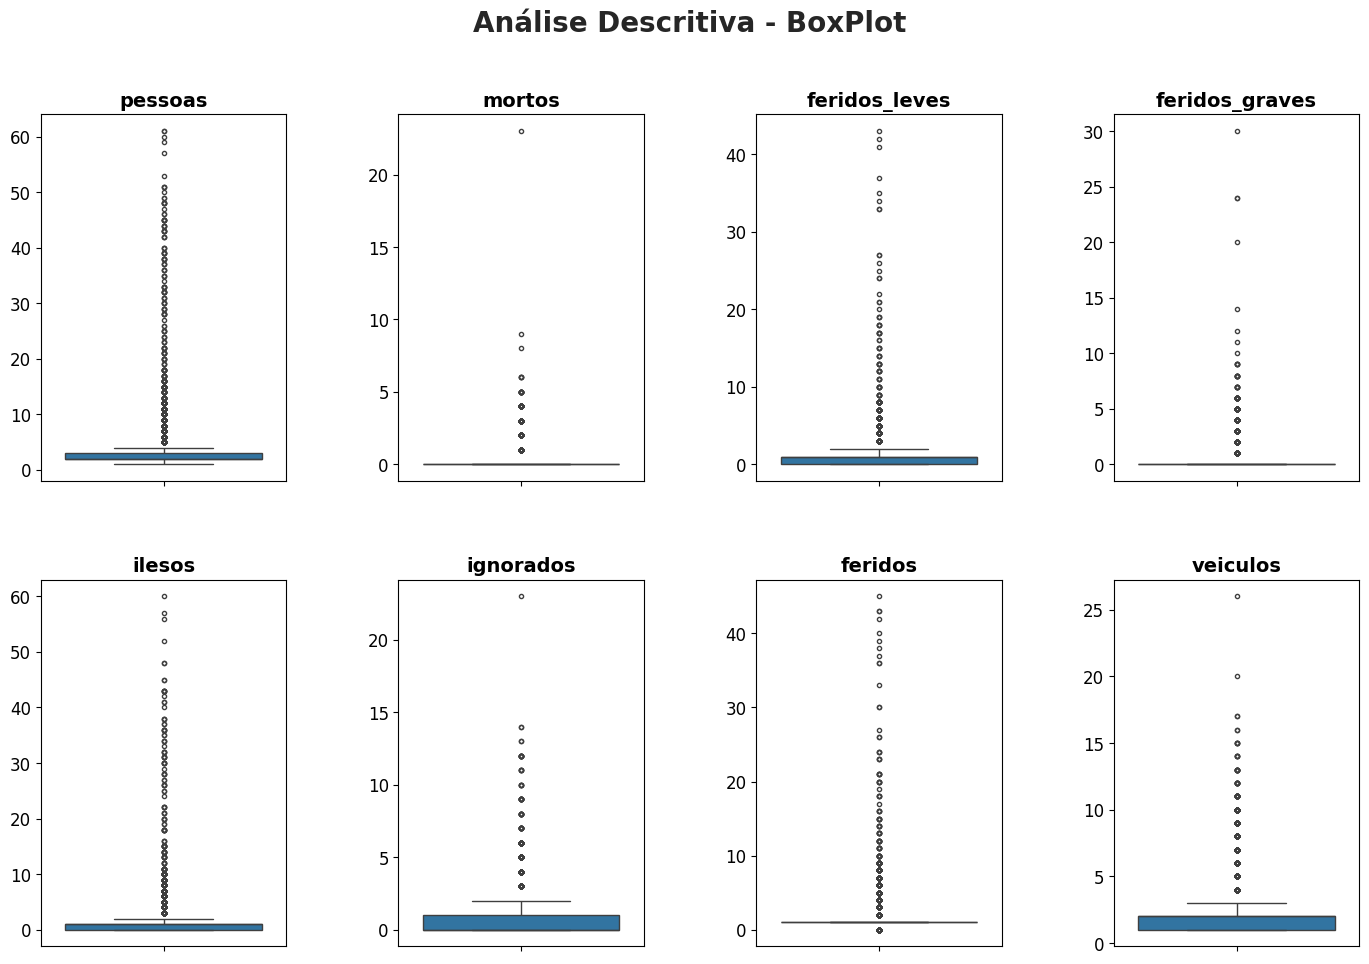

In [11]:
# Descrição estatística das colunas numéricas
cols_to_describe = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos']

#  Define o número de linhas com base no número de colunas numéricas
nrows = len(cols_to_describe) // 4 + (len(cols_to_describe) % 4 > 0)

# Inicializa o painel de gráficos
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, nrows * 5))

# Ajusta o layout
plt.tight_layout(pad=5)

# Estilo
sns.set_theme(style="whitegrid")

# Plota boxplots para cada coluna numérica
for i, column in enumerate(cols_to_describe):
    sns.boxplot(data=df[column], ax=axes[i//4, i%4], fliersize=3)
    axes[i//4, i%4].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    axes[i//4, i%4].set_ylabel('')
    axes[i//4, i%4].tick_params(axis='both', which='major', labelsize=12)

# Remove gráficos vazios (se houver)
for j in range(i+1, nrows*4):
    fig.delaxes(axes.flatten()[j])

# Adiciona título principal
fig.suptitle("Análise Descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.03)

In [12]:
def lista_valores_unicos(coluna_categorica):

    # Criação da lista de dicionários para consolidar os dados
    linhas = []

    for col in [coluna_categorica]:
        total = df[col].value_counts().sum()  # total apenas das top 5 (ou use df[col].count() para o total geral)
        #top_valores = df[col].value_counts().head(5)
        top_valores = df[col].value_counts()


        for categoria, qtd in top_valores.items():
            porcentagem = (qtd / df[col].count()) * 100  # percentual sobre o total da coluna
            linhas.append({
                'Coluna': col,
                'Categoria': categoria,
                'Cardinalidade': qtd,
                'Porcentagem': f"{porcentagem:.2f}%"
            })

    # Criando o DataFrame consolidado
    df_valores_unicos = pd.DataFrame(linhas)

    # Exibindo a tabela
    return df_valores_unicos

In [13]:
lista_valores_unicos('causa_acidente')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,causa_acidente,reacao_tardia_ou_ineficiente_do_condutor,8982,14.90%
1,causa_acidente,ausencia_de_reacao_do_condutor,8791,14.59%
2,causa_acidente,acessar_a_via_sem_observar_a_presenca_dos_outr...,5758,9.55%
3,causa_acidente,condutor_deixou_de_manter_distancia_do_veiculo...,3729,6.19%
4,causa_acidente,manobra_de_mudanca_de_faixa,3488,5.79%
...,...,...,...,...
64,causa_acidente,farois_desregulados,5,0.01%
65,causa_acidente,transitar_na_calcada,5,0.01%
66,causa_acidente,sistema_de_drenagem_ineficiente,4,0.01%
67,causa_acidente,sinalizacao_encoberta,2,0.00%


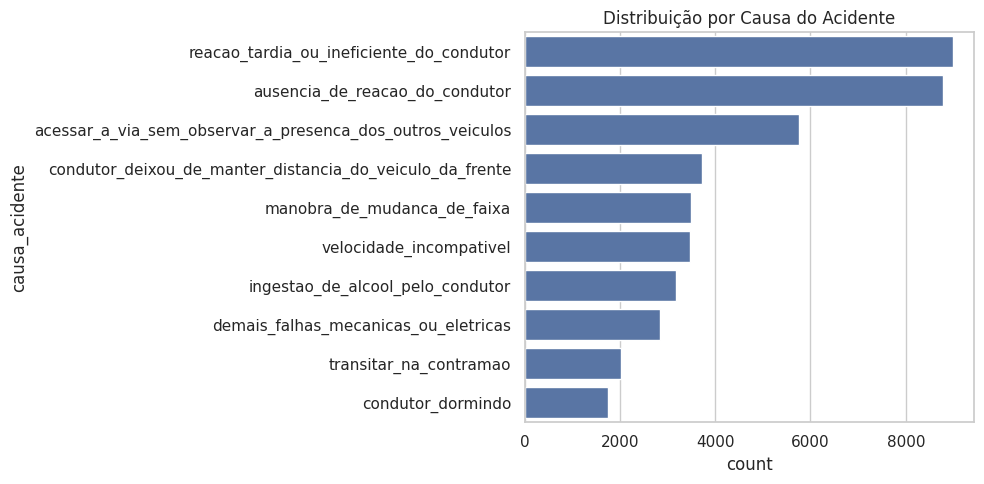

In [14]:

causas_counts = df['causa_acidente'].value_counts()
causas_filtradas = causas_counts[causas_counts > 0].head(10)

# Gráfico 1 – Tipo de acidente
plt.figure(figsize=(10, 5))
sns.countplot(y='causa_acidente', data=df, order=causas_filtradas.index)
plt.title('Distribuição por Causa do Acidente')
plt.tight_layout()
plt.show()

In [15]:
# 1. Distribuição de acidentes por tipo
lista_valores_unicos('tipo_acidente')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,tipo_acidente,colisao_traseira,11629,19.30%
1,tipo_acidente,saida_de_leito_carrocavel,8781,14.57%
2,tipo_acidente,colisao_transversal,7751,12.86%
3,tipo_acidente,colisao_lateral_mesmo_sentido,6532,10.84%
4,tipo_acidente,tombamento,5300,8.79%
5,tipo_acidente,colisao_com_objeto,4129,6.85%
6,tipo_acidente,colisao_frontal,3942,6.54%
7,tipo_acidente,queda_de_ocupante_de_veiculo,2805,4.65%
8,tipo_acidente,atropelamento_de_pedestre,2656,4.41%
9,tipo_acidente,colisao_lateral_sentido_oposto,1660,2.75%


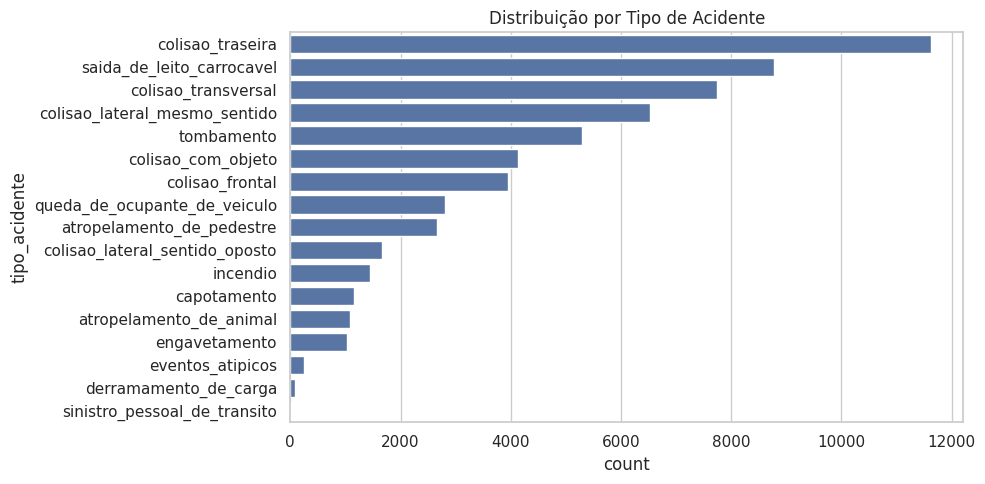

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(y='tipo_acidente', data=df, order=df['tipo_acidente'].value_counts().index)
plt.title('Distribuição por Tipo de Acidente')
plt.tight_layout()
plt.show()

In [17]:
lista_valores_unicos('classificacao_acidente')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,classificacao_acidente,com_vitimas_feridas,46251,76.74%
1,classificacao_acidente,sem_vitimas,9730,16.14%
2,classificacao_acidente,com_vitimas_fatais,4288,7.11%


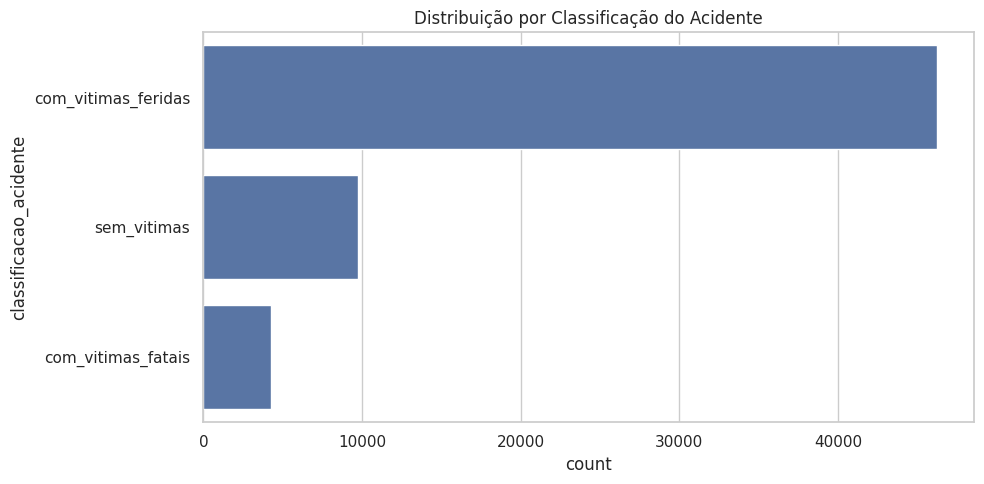

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y='classificacao_acidente', data=df, order=df['classificacao_acidente'].value_counts().index)
plt.title('Distribuição por Classificação do Acidente')
plt.tight_layout()
plt.show()

In [19]:
lista_valores_unicos('fase_dia')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,fase_dia,pleno_dia,32836,54.48%
1,fase_dia,plena_noite,21232,35.23%
2,fase_dia,anoitecer,3317,5.50%
3,fase_dia,amanhecer,2884,4.79%


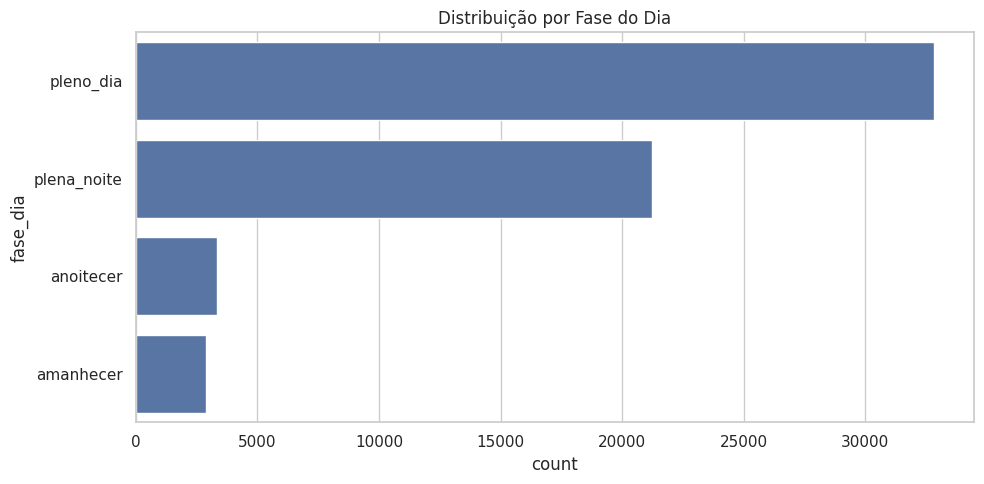

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y='fase_dia', data=df, order=df['fase_dia'].value_counts().index)
plt.title('Distribuição por Fase do Dia')
plt.tight_layout()
plt.show()

In [21]:
lista_valores_unicos('condicao_metereologica')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,condicao_metereologica,ceu_claro,39265,65.15%
1,condicao_metereologica,nublado,8628,14.32%
2,condicao_metereologica,chuva,5492,9.11%
3,condicao_metereologica,sol,3292,5.46%
4,condicao_metereologica,garoa_chuvisco,2094,3.47%
5,condicao_metereologica,ignorado,780,1.29%
6,condicao_metereologica,nevoeiro_neblina,612,1.02%
7,condicao_metereologica,vento,103,0.17%
8,condicao_metereologica,granizo,2,0.00%
9,condicao_metereologica,neve,1,0.00%


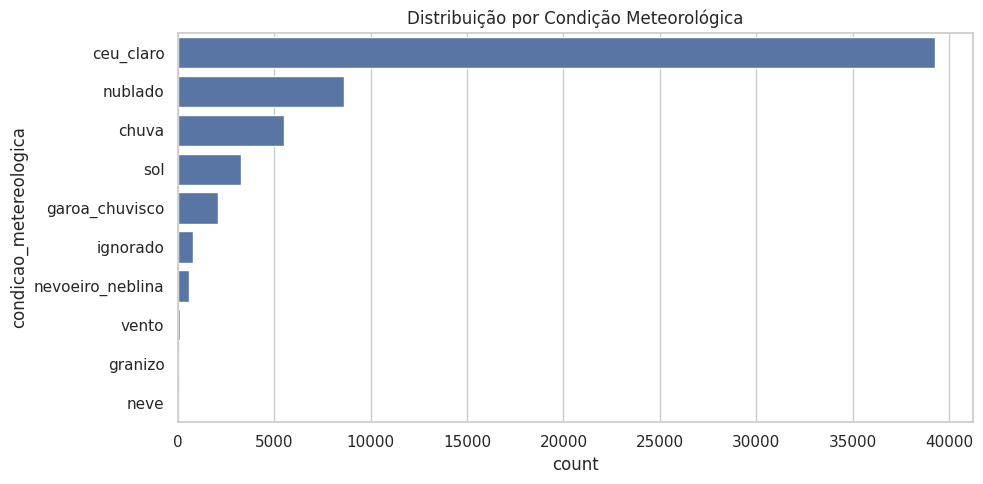

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y='condicao_metereologica', data=df, order=df['condicao_metereologica'].value_counts().index)
plt.title('Distribuição por Condição Meteorológica')
plt.tight_layout()
plt.show()

In [23]:
lista_valores_unicos('tipo_pista')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,tipo_pista,simples,29049,48.20%
1,tipo_pista,dupla,25311,42.00%
2,tipo_pista,multipla,5909,9.80%


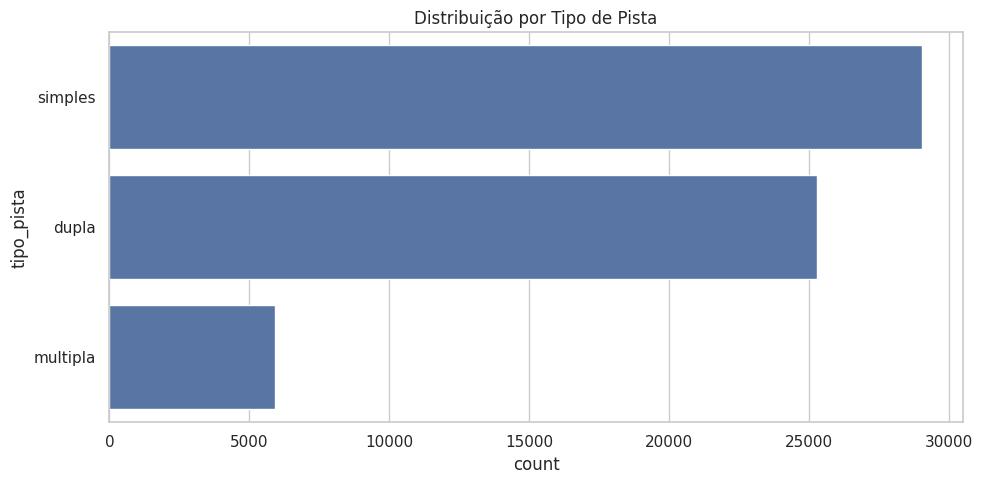

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y='tipo_pista', data=df, order=df['tipo_pista'].value_counts().index)
plt.title('Distribuição por Tipo de Pista')
plt.tight_layout()
plt.show()

In [25]:
lista_valores_unicos('sentido_via')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,sentido_via,crescente,32303,53.60%
1,sentido_via,decrescente,27861,46.23%
2,sentido_via,nao_informado,105,0.17%


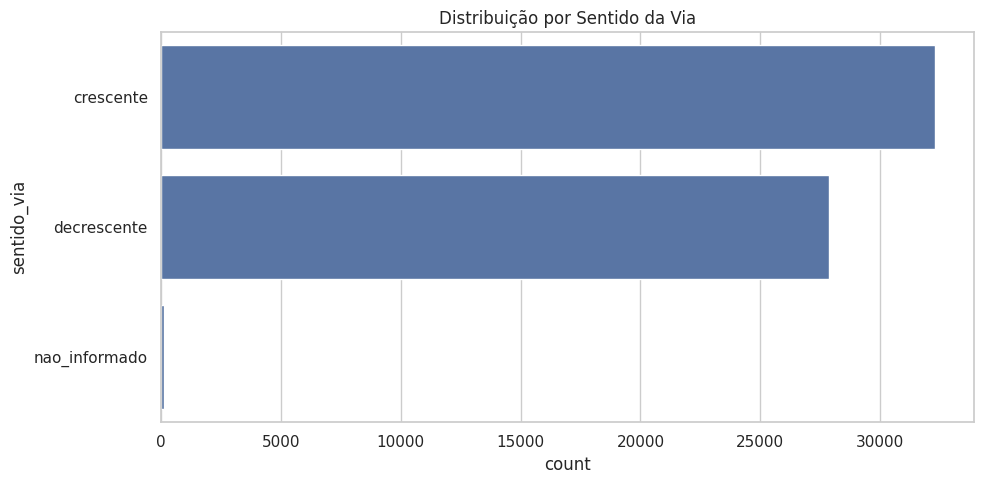

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(y='sentido_via', data=df, order=df['sentido_via'].value_counts().index)
plt.title('Distribuição por Sentido da Via')
plt.tight_layout()
plt.show()

In [27]:
lista_valores_unicos('dia_semana')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,dia_semana,domingo,9675,16.05%
1,dia_semana,sabado,9462,15.70%
2,dia_semana,sexta_feira,9203,15.27%
3,dia_semana,segunda_feira,8439,14.00%
4,dia_semana,quinta_feira,7983,13.25%
5,dia_semana,quarta_feira,7866,13.05%
6,dia_semana,terca_feira,7641,12.68%


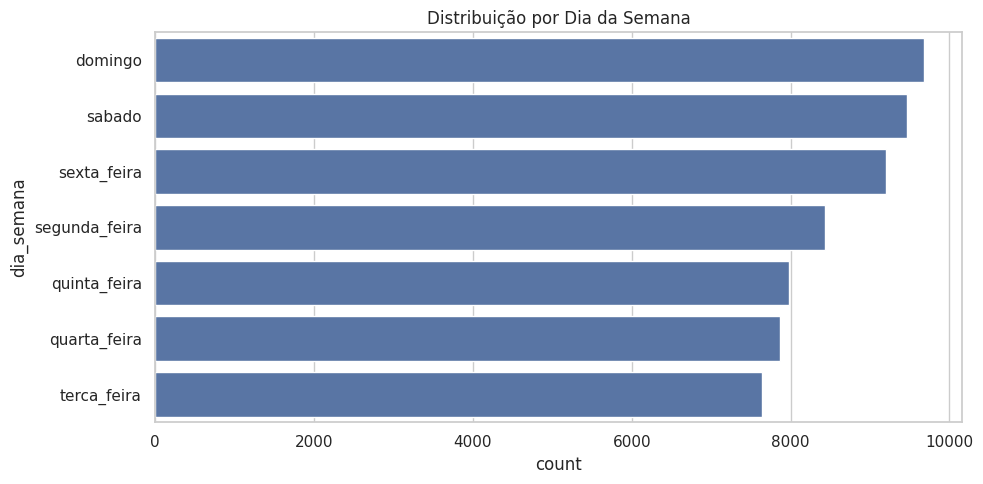

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(y='dia_semana', data=df, order=df['dia_semana'].value_counts().index)
plt.title('Distribuição por Dia da Semana')
plt.tight_layout()
plt.show()

In [29]:
lista_valores_unicos('uf')

,Coluna,Categoria,Cardinalidade,Porcentagem
0,uf,mg,7595,12.60%
1,uf,sc,6915,11.47%
2,uf,pr,6212,10.31%
3,uf,rj,5228,8.67%
4,uf,rs,4318,7.16%
5,uf,sp,4033,6.69%
6,uf,ba,3392,5.63%
7,uf,go,2775,4.60%
8,uf,pe,2682,4.45%
9,uf,mt,2130,3.53%


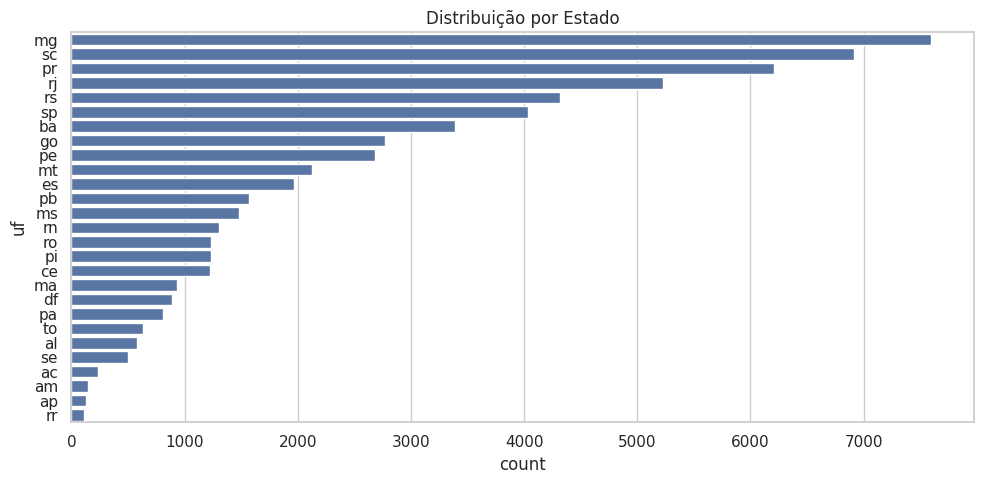

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(y='uf', data=df, order=df['uf'].value_counts().index)
plt.title('Distribuição por Estado')
plt.tight_layout()
plt.show()

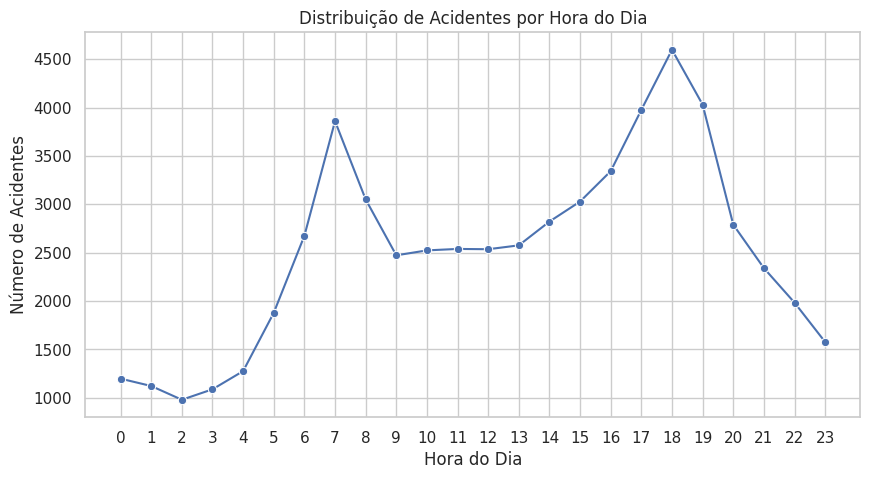

In [31]:
# Converte para hora (0–23)
df['hora'] = pd.to_datetime(df['horario'], format='%H:%M:%S', errors='coerce').dt.hour

# Remove registros com horário inválido (caso existam)
df = df.dropna(subset=['hora'])

# Conta os acidentes por hora
hora_counts = df['hora'].value_counts().sort_index()

# Plota a distribuição de acidentes por hora usando sns.lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hora_counts.index, y=hora_counts.values, marker='o')
plt.title('Distribuição de Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))
plt.grid(True)
plt.show()


In [32]:
# 4. Análise de gravidade
print("\
Estatísticas de vítimas:")
estatisticas = {
    'Total de Mortos': df['mortos'].sum(),
    'Total de Feridos Graves': df['feridos_graves'].sum(),
    'Total de Feridos Leves': df['feridos_leves'].sum(),
    'Total de Ilesos': df['ilesos'].sum()
}
for k, v in estatisticas.items():
    print(k + ": " + str(v))

Estatísticas de vítimas:
Total de Mortos: 5007
Total de Feridos Graves: 16725
Total de Feridos Leves: 52626
Total de Ilesos: 62819


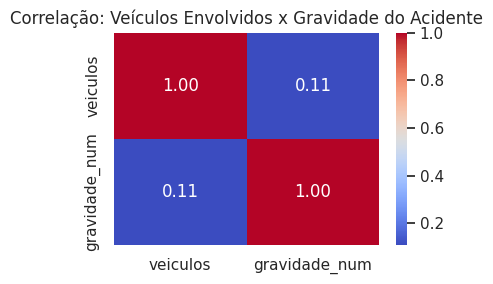

In [33]:
# Correlação entre número de veículos e gravidade do acidente
# Para gravidade, vamos usar classificacao_acidente (ordinal encoding)
gravidade_map = {'sem_vitimas': 0, 'com_vitimas_feridas': 1, 'com_vitimas_fatais': 2}
df['gravidade_num'] = df['classificacao_acidente'].map(gravidade_map)


# Heatmap de correlação
corr = df[['veiculos', 'gravidade_num']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação: Veículos Envolvidos x Gravidade do Acidente')
plt.tight_layout()
plt.show()

In [34]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,hora,gravidade_num
0,571804.0,01/01/2024,segunda_feira,04:50:00,pi,343,185,piripiri,manobra_de_mudanca_de_faixa,colisao_frontal,...,0,0,2,429603281,4176732659,sprf_pi,del02_pi,uop01_del02_pi,4,2
1,571806.0,01/01/2024,segunda_feira,04:30:00,ba,116,578,brejoes,ingestao_de_alcool_pelo_condutor,colisao_frontal,...,2,0,4,1307158302,399611107,sprf_ba,del03_ba,uop02_del03_ba,4,2
2,571818.0,01/01/2024,segunda_feira,06:30:00,se,101,18,malhada_dos_bois,reacao_tardia_ou_ineficiente_do_condutor,saida_de_leito_carrocavel,...,2,1,3,1035601949,3690552235,sprf_se,del02_se,uop02_del02_se,6,1
3,571838.0,01/01/2024,segunda_feira,05:00:00,mt,364,240,rondonopolis,condutor_deixou_de_manter_distancia_do_veiculo...,colisao_traseira,...,1,0,3,1617914141,5478905337,sprf_mt,del02_mt,uop01_del02_mt,5,0
4,571855.0,01/01/2024,segunda_feira,11:50:00,mg,251,447,grao_mogol,velocidade_incompativel,colisao_traseira,...,1,1,3,1643408996,4327992195,sprf_mg,del12_mg,uop01_del12_mg,11,1


Principais insights da análise:

    Maior concentração de acidentes durante o dia, com picos nos horários de 7h e 18h
    Condições meteorológicas predominantes são "Céu Claro"
    Correlação positiva (0.21) entre número de veículos e gravidade do acidente


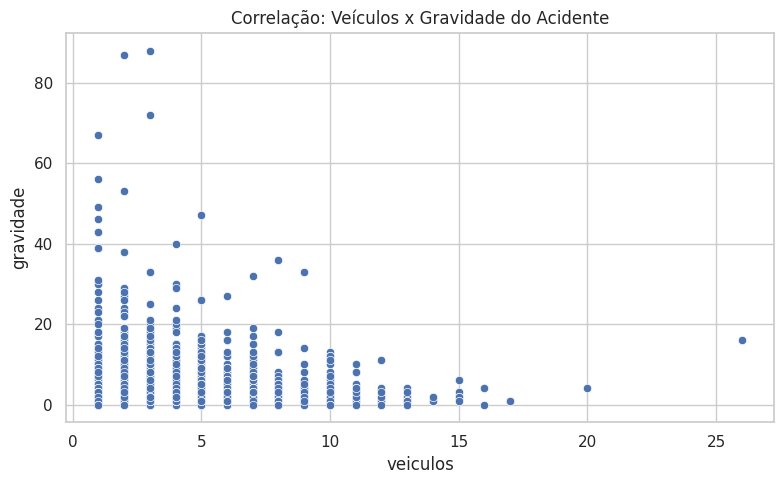

In [35]:
# Gravidade ponderada (exemplo)
df['gravidade'] = df['mortos'] * 3 + df['feridos_graves'] * 2 + df['feridos_leves']

# 5. Correlação entre número de veículos e gravidade
#df['total_vitimas'] = df['mortos'] + df['feridos_graves'] + df['feridos_leves']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='veiculos', y='gravidade')
plt.title('Correlação: Veículos x Gravidade do Acidente')
plt.tight_layout()
plt.show()


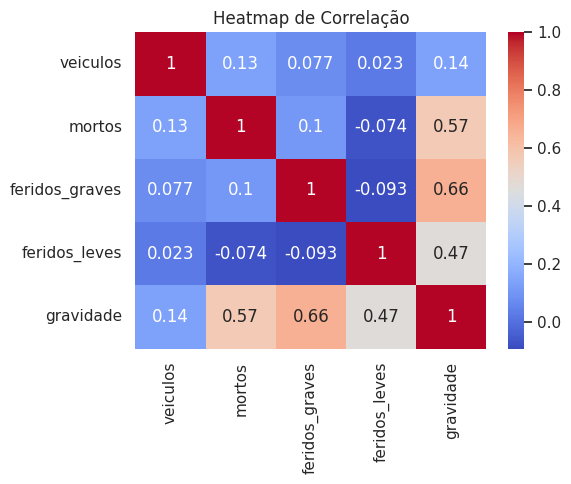

In [36]:
# Gráfico 5 – Heatmap de correlação
plt.figure(figsize=(6,5))
sns.heatmap(df[['veiculos', 'mortos', 'feridos_graves', 'feridos_leves', 'gravidade']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.tight_layout()
plt.show()

In [37]:
# Calcular correlação
corr = df[['veiculos', 'gravidade']].corr().iloc[0,1]
print("\
Correlação entre número de veículos e total de vítimas:", round(corr, 3))

Correlação entre número de veículos e total de vítimas: 0.136



    Padrões temporais claros com picos de acidentes em horários específicos
    Condições meteorológicas têm impacto significativo
    Estatísticas de vítimas mostram:
    Total de Mortos: 5016

Total de Feridos Graves: 16756

Total de Feridos Leves: 52686

Total de Ilesos: 62975

 

A correlação entre número de veículos e vítimas é baixa (0.096)

## -------------------------------------------------

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ANOVA multifatorial
modelo = smf.ols('gravidade ~ C(tipo_pista) + C(condicao_metereologica) + C(fase_dia)', data=df).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabela)

                                  sum_sq       df           F         PR(>F)
C(tipo_pista)                2770.060050      2.0  381.352492  2.631312e-165
C(condicao_metereologica)      68.187223      9.0    2.086065   2.719597e-02
C(fase_dia)                   155.737600      3.0   14.293534   2.627990e-09
Residual                   218835.856081  60254.0         NaN            NaN


In [72]:
# Coeficientes do modelo de ANOVA multifatorial
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              gravidade   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     60.22
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.13e-169
Time:                        09:04:02   Log-Likelihood:            -1.2438e+05
No. Observations:               60269   AIC:                         2.488e+05
Df Residuals:                   60254   BIC:                         2.489e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

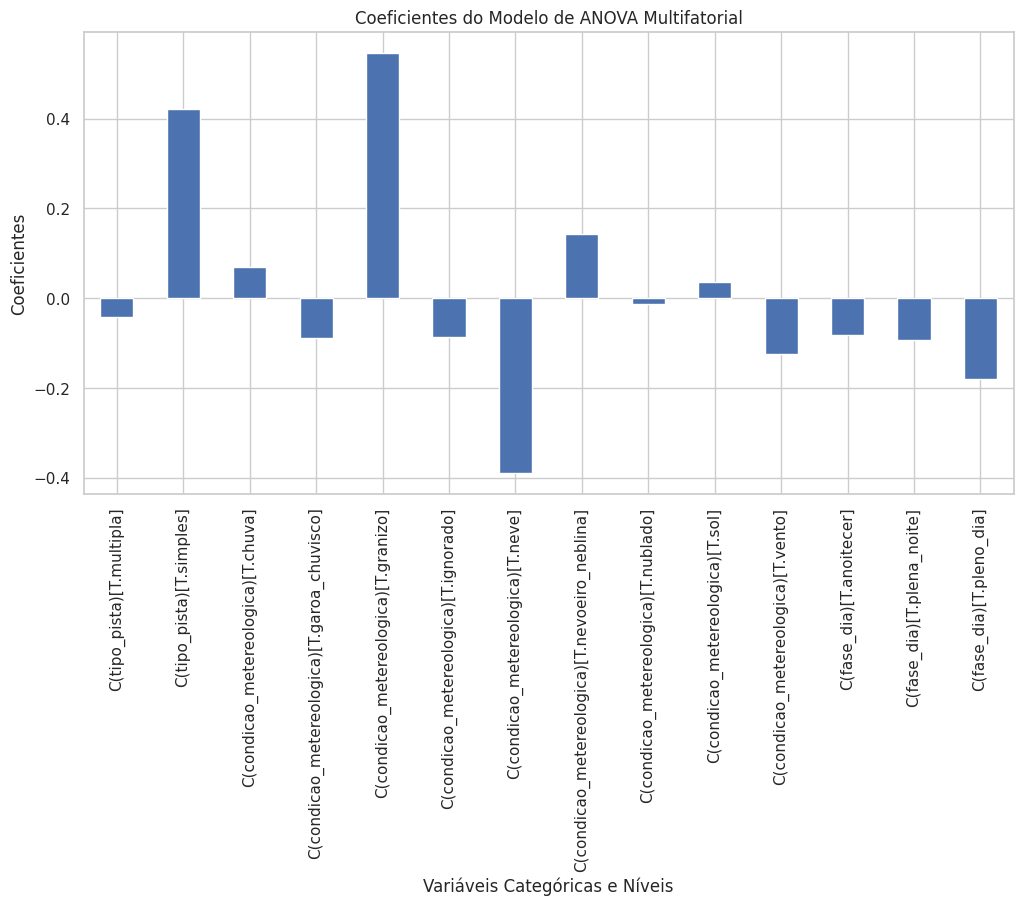

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Extrair os coeficientes do modelo de ANOVA multifatorial
coeficientes = modelo.params[1:]  # Ignorar o intercepto

# Criar um gráfico de barras para os coeficientes
plt.figure(figsize=(12, 6))
coeficientes.plot(kind='bar')
plt.title('Coeficientes do Modelo de ANOVA Multifatorial')
plt.xlabel('Variáveis Categóricas e Níveis')
plt.ylabel('Coeficientes')
plt.xticks(rotation=90)
plt.show()


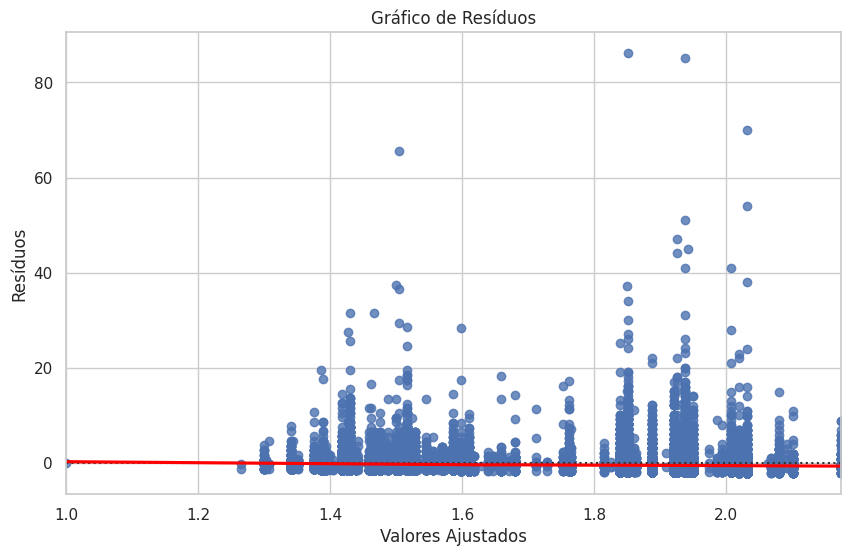

In [74]:
# Resíduos do modelo
residuos = modelo.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()


In [55]:
import pandas as pd
from scipy.stats import f_oneway

# Exemplo: comparar o número de vítimas entre diferentes condições da via
grupos = [grupo['feridos'].dropna() for nome, grupo in df.groupby('tipo_pista')]

# Teste ANOVA
f_stat, p_valor = f_oneway(*grupos)

print(f'Estatística F: {f_stat}')
print(f'Valor-p: {p_valor}')

if p_valor < 0.05:
    print('Diferenças significativas entre os grupos.')
else:
    print('Nenhuma diferença significativa entre os grupos.')


Estatística F: 60.99707239049534
Valor-p: 3.436243762614045e-27
Diferenças significativas entre os grupos.


In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar o Teste de Tukey
tukey_result = pairwise_tukeyhsd(df['feridos'], df['tipo_pista'], alpha=0.05)

# Exibir os resultados
print(tukey_result)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   dupla multipla  -0.0067 0.9209 -0.0474  0.034  False
   dupla  simples    0.107    0.0  0.0827 0.1312   True
multipla  simples   0.1137    0.0  0.0734 0.1539   True
-------------------------------------------------------


Estatística F: 60.99707239049534
Valor-p: 3.436243762614045e-27

Diferenças significativas entre os grupos.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   dupla multipla  -0.0067 0.9209 -0.0474  0.034  False
   dupla  simples    0.107    0.0  0.0827 0.1312   True
multipla  simples   0.1137    0.0  0.0734 0.1539   True
-------------------------------------------------------


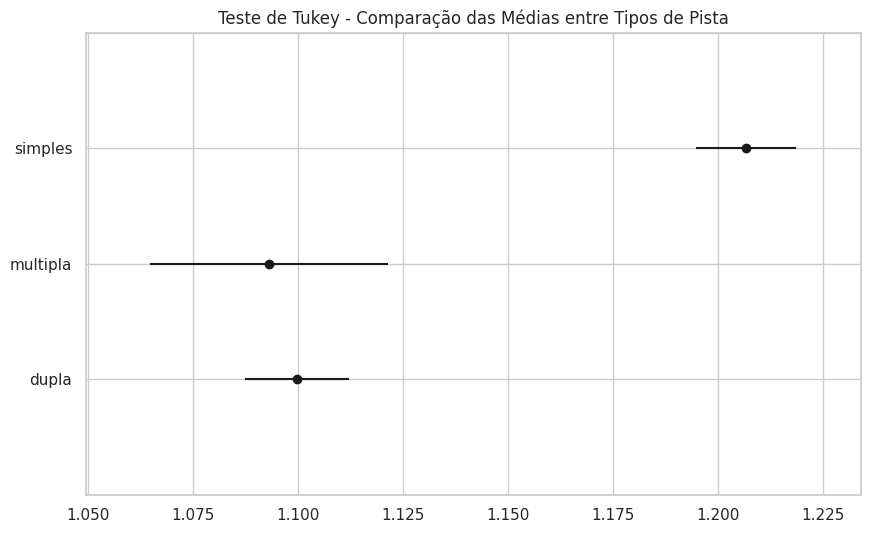

In [118]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Exemplo: comparar o número de vítimas entre diferentes condições da via
grupos = [grupo['feridos'].dropna() for nome, grupo in df.groupby('tipo_pista')]

# Teste ANOVA
f_stat, p_valor = f_oneway(*grupos)

print(f'Estatística F: {f_stat}')
print(f'Valor-p: {p_valor}', end='\n\n')

if p_valor < 0.05:
    print('Diferenças significativas entre os grupos.', end='\n\n')
else:
    print('Nenhuma diferença significativa entre os grupos.', end='\n\n')

# Realizar o Teste de Tukey
tukey_result = pairwise_tukeyhsd(df['feridos'], df['tipo_pista'], alpha=0.05)

# Exibir os resultados
print(tukey_result)

# Plotar os resultados do Tukey
fig, ax = plt.subplots(figsize=(8, 6))
tukey_result.plot_simultaneous(ax=ax)
plt.title('Teste de Tukey - Comparação das Médias entre Tipos de Pista')
plt.show()

In [119]:
from scipy.stats import chi2_contingency

# Exemplo: duas variáveis categóricas
tabela = pd.crosstab(df['classificacao_acidente'], df['tipo_pista'])

chi2, p, dof, expected = chi2_contingency(tabela)

print(f'Estatística do Qui-Quadrado: {chi2}', end='\n\n')
print(f'Valor-p: {p}', end='\n\n')
print(f'Graus de liberdade: {dof}', end='\n\n')
print('Frequências esperadas:')
print(expected, end='\n\n')

if p < 0.05:
    print('Há evidências para rejeitar H0: as variáveis são dependentes.')
else:
    print('Não há evidências para rejeitar H0: as variáveis são independentes.')


Estatística do Qui-Quadrado: 647.834418295545

Valor-p: 6.859874774970982e-139

Graus de liberdade: 4

Frequências esperadas:
[[ 1800.81912758   420.4116876   2066.76918482]
 [19423.90052929  4534.62242612 22292.47704458]
 [ 4086.28034313   953.96588628  4689.7537706 ]]

Há evidências para rejeitar H0: as variáveis são dependentes.


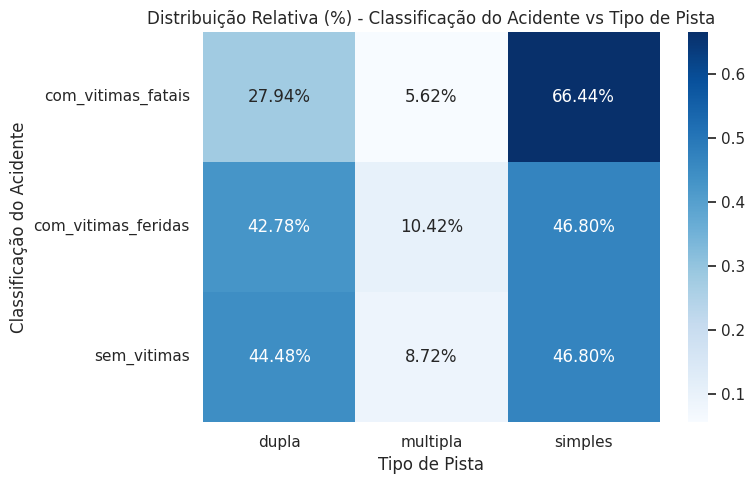

In [120]:
# Tabela de contingência normalizada (percentual)
tabela_pct = tabela.div(tabela.sum(axis=1), axis=0)

plt.figure(figsize=(8, 5))
sns.heatmap(tabela_pct, annot=True, fmt=".2%", cmap='Blues')
plt.title('Distribuição Relativa (%) - Classificação do Acidente vs Tipo de Pista')
plt.xlabel('Tipo de Pista')
plt.ylabel('Classificação do Acidente')
plt.tight_layout()
plt.show()

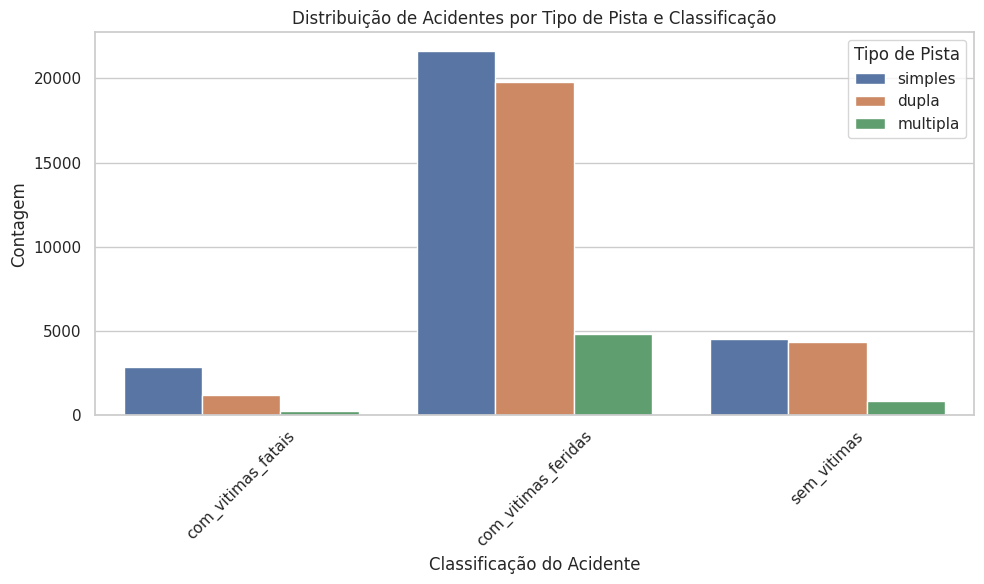

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='classificacao_acidente', hue='tipo_pista')
plt.title('Distribuição de Acidentes por Tipo de Pista e Classificação')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Pista')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
